<a href="https://colab.research.google.com/github/Debonik/Google-Trends-Data-Extractor/blob/main/Google_Trends_Data_Extractor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install pytrends seaborn


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for pytrends: filename=pytrends-4.8.0-py3-none-any.whl size=16126 sha256=483f5396b384decf5d64501e36878880e577768e8a7b411a88bf2624476d84a7
  Stored in directory: /root/.cache/pip/wheels/07/6f/5c/8174f98dec1bfbc7d5da4092854afcbcff4b26c3d9b66b5183
Successfully built pytrends


In [2]:
from pytrends.request import TrendReq
import seaborn
# for styling
seaborn.set_style("darkgrid")

In [3]:
# initialize a new Google Trends Request Object
pt = TrendReq(hl="en-US", tz=360)

In [4]:
# set the keyword & timeframe
pt.build_payload(["Python", "Java"], timeframe="all")

# get the interest over time
iot = pt.interest_over_time()
iot

,Python,Java,isPartial
date,,,
2004-01-01,7,94,False
2004-02-01,7,97,False
2004-03-01,7,100,False
2004-04-01,7,93,False
2004-05-01,6,92,False
...,...,...,...
2022-03-01,27,19,False
2022-04-01,26,19,False
2022-05-01,24,17,False


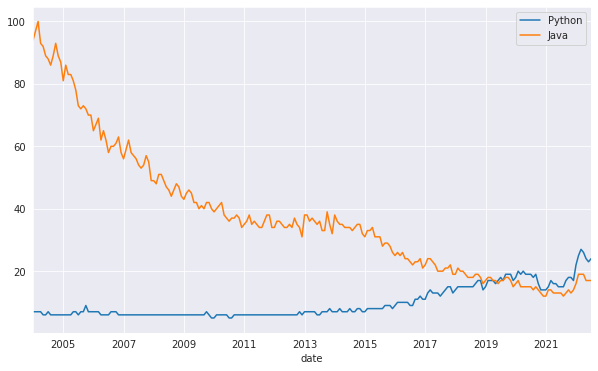

In [5]:
# plot it
iot.plot(figsize=(10, 6))

In [6]:
# get hourly historical interest
data = pt.get_historical_interest(
    ["data science"], 
    year_start=2022, month_start=1, day_start=1, hour_start=0,
    year_end=2022, month_end=2, day_end=10, hour_end=23,
)
data

,data science,isPartial
date,,
2022-01-01 00:00:00,21,False
2022-01-01 01:00:00,22,False
2022-01-01 02:00:00,20,False
2022-01-01 03:00:00,24,False
2022-01-01 04:00:00,27,False
...,...,...
2022-02-10 19:00:00,45,False
2022-02-10 20:00:00,47,False
2022-02-10 21:00:00,34,False


In [8]:
# the keyword to extract data
kw = "python"
pt.build_payload([kw], timeframe="all")
# get the interest by country
ibr = pt.interest_by_region("COUNTRY", inc_low_vol=True, inc_geo_code=True)

In [9]:
# sort the countries by interest
ibr[kw].sort_values(ascending=False)

geoName
British Indian Ocean Territory    100
St. Helena                         67
Singapore                          46
China                              46
South Korea                        44
                                 ... 
Bouvet Island                       0
Niue                                0
Christmas Island                    0
Heard & McDonald Islands            0
Guinea-Bissau                       0
Name: python, Length: 250, dtype: int64

In [10]:
# get related topics of the keyword
rt = pt.related_topics()
rt[kw]["top"]

,value,formattedValue,hasData,link,topic_mid,topic_title,topic_type
0,100,100,True,/trends/explore?q=/m/05z1_&date=all,/m/05z1_,Python,Programming language
1,7,7,True,/trends/explore?q=/m/01dlmc&date=all,/m/01dlmc,List,Abstract data type
2,7,7,True,/trends/explore?q=/m/06x16&date=all,/m/06x16,String,Computer science
3,6,6,True,/trends/explore?q=/m/020s1&date=all,/m/020s1,Computer file,Topic
4,4,4,True,/trends/explore?q=/m/0cv6_m&date=all,/m/0cv6_m,Pythons,Snake
5,3,3,True,/trends/explore?q=/m/0nk18&date=all,/m/0nk18,Associative array,Topic
6,3,3,True,/trends/explore?q=/m/026sq&date=all,/m/026sq,Data,Topic
7,3,3,True,/trends/explore?q=/m/02v_93z&date=all,/m/02v_93z,Function,Mathematics
8,3,3,True,/trends/explore?q=/m/04sd0&date=all,/m/04sd0,Monty Python,Comedy troupe
9,3,3,True,/trends/explore?q=/m/0wcx&date=all,/m/0wcx,Array data structure,Topic


In [11]:
# get related queries to previous keyword
rq = pt.related_queries()
rq[kw]["top"]

,query,value
0,for python,100
1,python list,87
2,python string,71
3,python with,65
4,monty python,46
5,python if,39
6,python install,38
7,python code,37
8,python function,35
9,python windows,30


In [12]:
# get suggested searches
pt.suggestions("python")

[{'mid': '/m/05z1_', 'title': 'Python', 'type': 'Programming language'},
 {'mid': '/m/05tb5', 'title': 'Python family', 'type': 'Snake'},
 {'mid': '/m/0cv6_m', 'title': 'Pythons', 'type': 'Snake'},
 {'mid': '/m/0l8ry', 'title': 'Python', 'type': 'Mythology'},
 {'mid': '/m/06bxxb', 'title': 'CPython', 'type': 'Computer program'}]

In [13]:
# another example of suggested searches
pt.suggestions("America")

[{'mid': '/m/01w6dw',
  'title': 'American Express',
  'type': 'Credit card service company'},
 {'mid': '/m/01yx7f',
  'title': 'Bank of America',
  'type': 'Financial services company'},
 {'mid': '/m/05_5rg',
  'title': 'América Futebol Clube MG',
  'type': 'Football team'},
 {'mid': '/m/03lq2', 'title': 'Halloween', 'type': 'Celebration'},
 {'mid': '/m/043m59x', 'title': 'B2W', 'type': 'Online retail company'}]

In [14]:
# trending searches per region
ts = pt.trending_searches(pn="united_kingdom")
ts[:5]

,0
0,Real Madrid vs Barcelona
1,Black Panther 2
2,Kate Moss
3,South Africa vs England
4,Blackpool vs Everton


In [15]:
# real-time trending searches
pt.realtime_trending_searches()

,title,entityNames
0,"3M Open, Scott Piercy, Tony Finau, PGA TOUR","[3M Open, Scott Piercy, Tony Finau, PGA TOUR]"
1,"Saturday Night Live, Kate McKinnon, Aidy Bryan...","[Saturday Night Live, Kate McKinnon, Aidy Brya..."
2,"Clube Atlético Mineiro, Campeonato Brasileiro ...","[Clube Atlético Mineiro, Campeonato Brasileiro..."
3,"San Francisco Giants, 2022, Dodgers","[San Francisco Giants, 2022, Dodgers]"
4,"Senior Open Championship, Darren Clarke, Pádra...","[Senior Open Championship, Darren Clarke, Pádr..."
...,...,...
137,"Los Angeles Dodgers, Pitcher, Minor League Bas...","[Los Angeles Dodgers, Pitcher, Minor League Ba..."
138,"Low-rise pants, Julia Fox","[Low-rise pants, Julia Fox]"
139,"Espresso machine, Caffeine, Nespresso, Milk","[Espresso machine, Caffeine, Nespresso, Milk]"
140,"Kendrick Lamar, Love., Hip hop music, Love","[Kendrick Lamar, Love., Hip hop music, Love]"
